In [166]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [167]:
Rose = pd.read_csv("Rose.csv",header = 0, index_col = 0, parse_dates = True,squeeze=False) # squeeze as true read data as series

In [168]:
print(Rose.head())
print(Rose.tail())

             Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0
            Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0


In [169]:
Rose.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-01 to 1995-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    185 non-null    float64
dtypes: float64(1)
memory usage: 2.9 KB


In [170]:
Rose.isna().sum()

Rose    2
dtype: int64

In [171]:
Rose.describe()

,Rose
count,185.000000
mean,90.394595
std,39.175344
min,28.000000
25%,63.000000
50%,86.000000
75%,112.000000
max,267.000000


In [172]:
Rose.tail(15)['1994']

,Rose
YearMonth,
1994-05-01,44.0
1994-06-01,45.0
1994-07-01,NaN
1994-08-01,NaN
1994-09-01,46.0
1994-10-01,51.0
1994-11-01,63.0
1994-12-01,84.0


In [173]:
Rose.fillna(value = Rose['Rose'].median(),inplace=True)
Rose.tail(15)['1994']

,Rose
YearMonth,
1994-05-01,44.0
1994-06-01,45.0
1994-07-01,86.0
1994-08-01,86.0
1994-09-01,46.0
1994-10-01,51.0
1994-11-01,63.0
1994-12-01,84.0


<Figure size 1080x360 with 0 Axes>

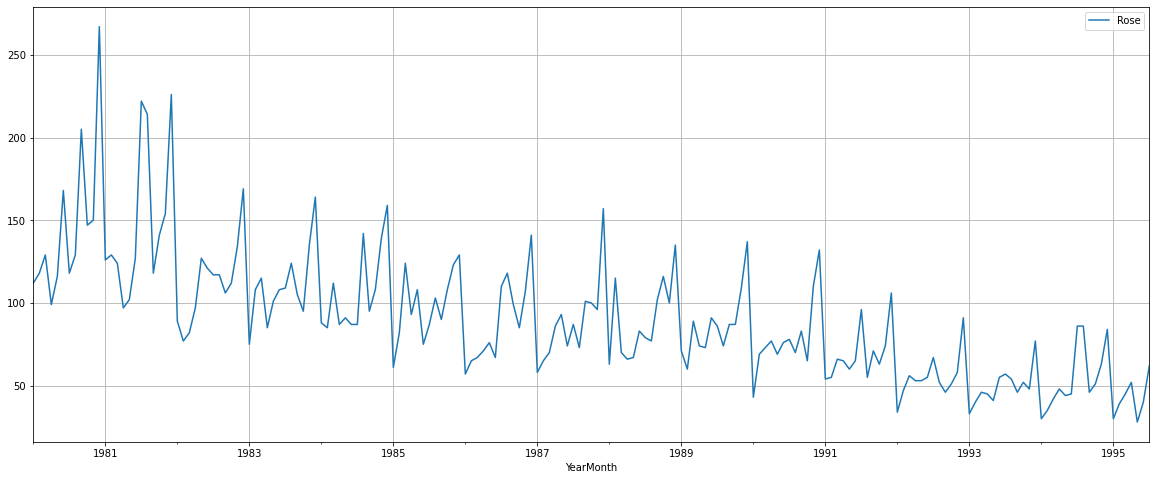

In [174]:
plt.figure(figsize=(15,5));
Rose.plot(figsize=(20,8));
plt.grid();

In [175]:
type(Rose)

pandas.core.frame.DataFrame

### Yearly Boxplot

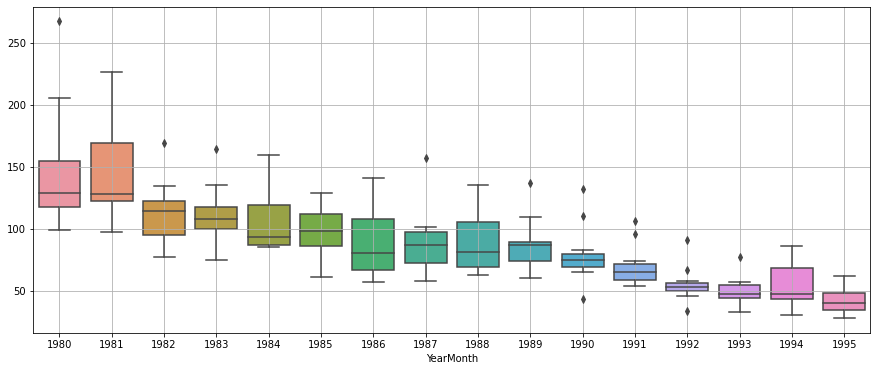

In [176]:
plt.figure(figsize=(15,6))
sns.boxplot(x = Rose.index.year,y = Rose.values[:,0])
plt.grid();

### Monthly Boxplot

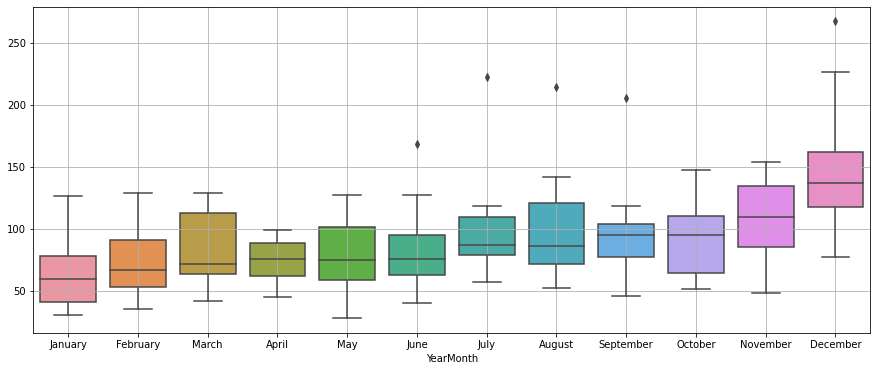

In [177]:
plt.figure(figsize=(15,6))
sns.boxplot(x = Rose.index.month_name(),y = Rose.values[:,0])
plt.grid();

## Decompose the Time Series

In [178]:
from pylab import rcParams
rcParams['figure.figsize'] = 15,8

In [179]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

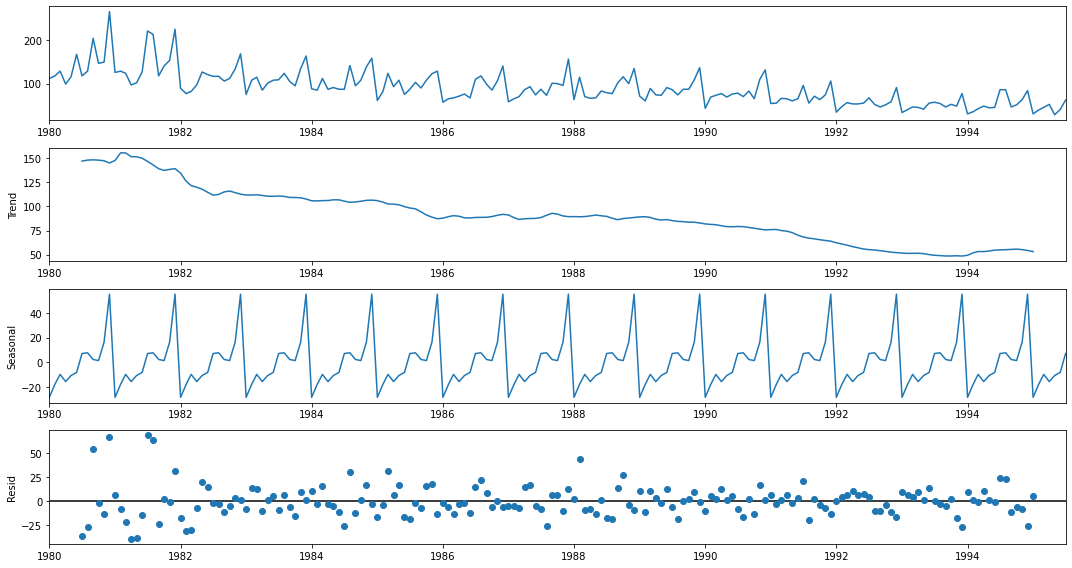

In [180]:
decomposition = seasonal_decompose(Rose,model='additive')
decomposition.plot();

In [181]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-01           NaN
1980-02-01           NaN
1980-03-01           NaN
1980-04-01           NaN
1980-05-01           NaN
1980-06-01           NaN
1980-07-01    147.083333
1980-08-01    148.125000
1980-09-01    148.375000
1980-10-01    148.083333
1980-11-01    147.416667
1980-12-01    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-01   -28.355258
1980-02-01   -17.794345
1980-03-01    -9.764583
1980-04-01   -15.577083
1980-05-01   -10.675298
1980-06-01    -8.157440
1980-07-01     7.161409
1980-08-01     7.741964
1980-09-01     2.328075
1980-10-01     1.425298
1980-11-01    16.400298
1980-12-01    55.266964
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-01          NaN
1980-02-01          NaN
1980-03-01          NaN
1980-04-01          NaN
1980-05-01          NaN
1980-06-01          NaN
1980-07-01   -36.244742
1980-08-01   -26.866964
1980-09-01    54.296925
1980-10-01    -2.508631
1980-11-01   -13.816964
1980-12-01    66.60803

## Split the data into train and test and plot the training and test data.

In [182]:
Rose.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [183]:
Rose.shape

(187, 1)

In [184]:
train = Rose[Rose.index<'1991']
test = Rose[Rose.index>='1991']

In [185]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


In [186]:
print('First few rows of Training Data','\n',train.head(),'\n')
print('Last few rows of Training Data','\n',train.tail(),'\n\n')
print('First few rows of Test Data','\n',test.head(),'\n')
print('Last few rows of Test Data','\n',test.tail(),'\n')

First few rows of Training Data 
              Rose
YearMonth        
1980-01-01  112.0
1980-02-01  118.0
1980-03-01  129.0
1980-04-01   99.0
1980-05-01  116.0 

Last few rows of Training Data 
              Rose
YearMonth        
1990-08-01   70.0
1990-09-01   83.0
1990-10-01   65.0
1990-11-01  110.0
1990-12-01  132.0 


First few rows of Test Data 
             Rose
YearMonth       
1991-01-01  54.0
1991-02-01  55.0
1991-03-01  66.0
1991-04-01  65.0
1991-05-01  60.0 

Last few rows of Test Data 
             Rose
YearMonth       
1995-03-01  45.0
1995-04-01  52.0
1995-05-01  28.0
1995-06-01  40.0
1995-07-01  62.0 



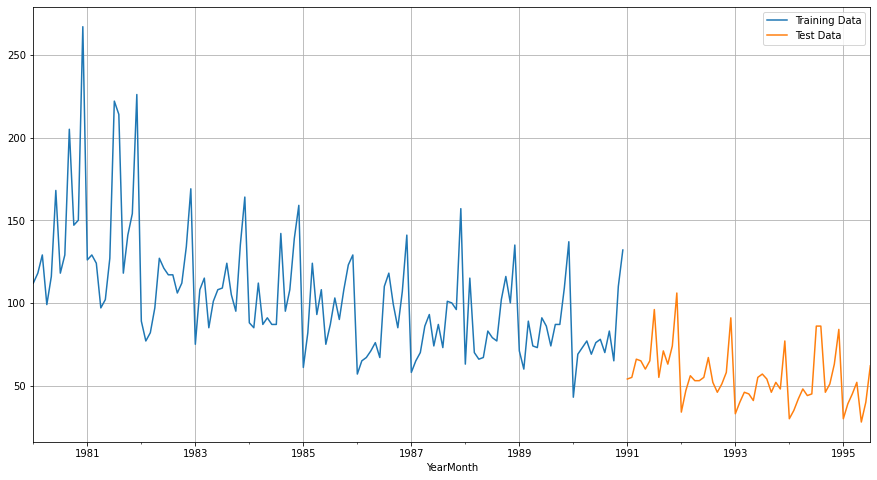

In [187]:
train['Rose'].plot()
test['Rose'].plot()
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

# Building different models and comparing the accuracy metrics.

In [188]:
train.head(10)

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0
1980-06-01,168.0
1980-07-01,118.0
1980-08-01,129.0
1980-09-01,205.0


## Model 1: Linear Regression

In [189]:
list(range(len(train)))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131]

In [190]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time,'\n')
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132] 

Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [191]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [192]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
YearMonth              
1980-01-01  112.0     1
1980-02-01  118.0     2
1980-03-01  129.0     3
1980-04-01   99.0     4
1980-05-01  116.0     5 

Last few rows of Training Data 
              Rose  time
YearMonth              
1990-08-01   70.0   128
1990-09-01   83.0   129
1990-10-01   65.0   130
1990-11-01  110.0   131
1990-12-01  132.0   132 


First few rows of Test Data 
             Rose  time
YearMonth             
1991-01-01  54.0   133
1991-02-01  55.0   134
1991-03-01  66.0   135
1991-04-01  65.0   136
1991-05-01  60.0   137 

Last few rows of Test Data 
             Rose  time
YearMonth             
1995-03-01  45.0   183
1995-04-01  52.0   184
1995-05-01  28.0   185
1995-06-01  40.0   186
1995-07-01  62.0   187 



In [193]:
LinearRegression_train.head()

,Rose,time
YearMonth,,
1980-01-01,112.0,1
1980-02-01,118.0,2
1980-03-01,129.0,3
1980-04-01,99.0,4
1980-05-01,116.0,5


In [194]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [195]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression()

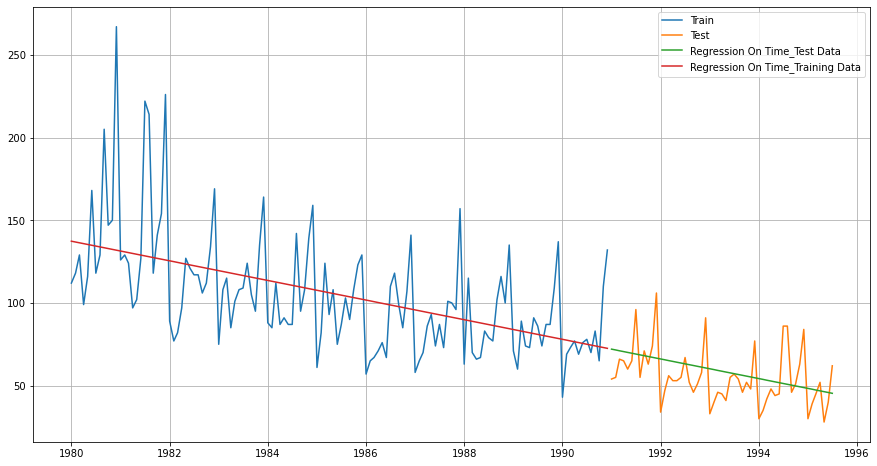

In [196]:
# Generating the predictions on the training data
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
# Adding the predictions on the training set to the afore-defined Linear Regression Training data
LinearRegression_train['RegOnTime'] = train_predictions_model1

# Generating the predictions on the test data
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
# Adding the predictions on the test set to the afore-defined Linear Regression Test data
LinearRegression_test['RegOnTime'] = test_predictions_model1

# Plotting the actual training data
plt.plot( train['Rose'], label='Train')
# Plotting the actual test data
plt.plot(test['Rose'], label='Test')
# Plotting the predicted training data
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
# Plotting the predicted test data
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
# Setting the location of the legend
plt.legend(loc='best')
plt.grid();

In [197]:
from sklearn import metrics
from   math              import sqrt

In [380]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

### Model Evaluation

In [199]:
## Training Data - RMSE and MAPE

rmse_model1_train = (metrics.mean_squared_error(train['Rose'],train_predictions_model1))**0.5
mape_model1_train = MAPE(train['Rose'],train_predictions_model1)
print("For RegressionOnTime forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_train, mape_model1_train))

For RegressionOnTime forecast on the Training Data,  RMSE is 30.718 MAPE is 21.62


In [200]:
## Test Data - RMSE and MAPE

rmse_model1_test = (metrics.mean_squared_error(test['Rose'],test_predictions_model1))**0.5
mape_model1_test = MAPE(test['Rose'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 16.626 MAPE is 25.99


In [201]:
RMSE=((sum((test['Rose']-test_predictions_model1)**2))/len(test_predictions_model1))**(0.5)
print(RMSE)

16.626144083652605


In [202]:
resultsDf = pd.DataFrame({'RMSE': [rmse_model1_test],'MAPE': [mape_model1_test]},index=['RegressionOnTime'])
resultsDf

,RMSE,MAPE
RegressionOnTime,16.626144,25.986057


## Model 2: Naive

In [203]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [204]:
NaiveModel_train.tail()

,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


In [205]:
NaiveModel_test.head()

,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


In [206]:
NaiveModel_test['naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['naive'].head()

YearMonth
1991-01-01    132.0
1991-02-01    132.0
1991-03-01    132.0
1991-04-01    132.0
1991-05-01    132.0
Name: naive, dtype: float64

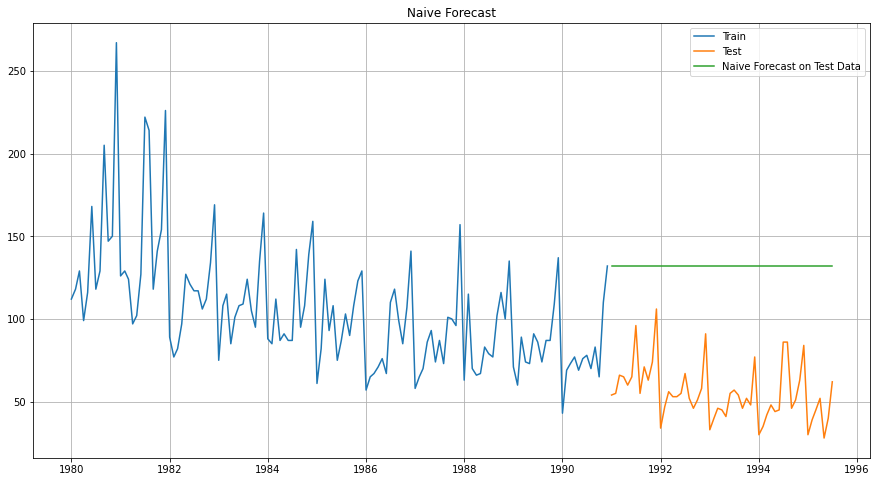

In [207]:
## Plotting the actual training data
plt.plot(NaiveModel_train['Rose'], label='Train')
## Plotting the acutal test data
plt.plot(test['Rose'], label='Test')
## Plottig the predicted test data
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

In [208]:
## Test Data - RMSE and MAPE

rmse_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['naive'])**0.5
mape_model2_test = MAPE(test['Rose'],NaiveModel_test['naive'])
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model2_test, mape_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 78.485 MAPE is 159.88


In [209]:
resultsDf_2 = pd.DataFrame({'RMSE': [rmse_model2_test],'MAPE': [mape_model2_test]},index=['NaiveModel'])

resultsDf = pd.concat([resultsDf, resultsDf_2])
resultsDf

,RMSE,MAPE
RegressionOnTime,16.626144,25.986057
NaiveModel,78.485320,159.878078


## Method 3: Simple Average

In [210]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [211]:
SimpleAverage_test['mean_forecast'] = train['Rose'].mean()
SimpleAverage_test.head()

,Rose,mean_forecast
YearMonth,,
1991-01-01,54.0,104.939394
1991-02-01,55.0,104.939394
1991-03-01,66.0,104.939394
1991-04-01,65.0,104.939394
1991-05-01,60.0,104.939394


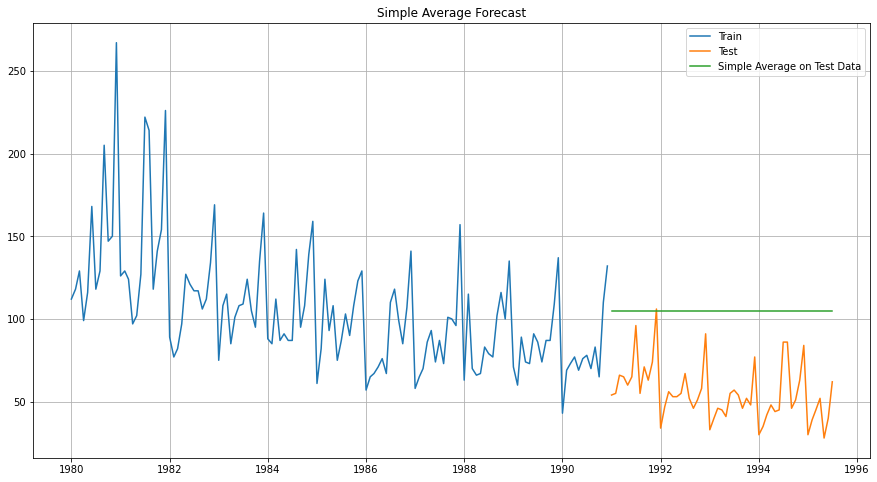

In [212]:
plt.plot(SimpleAverage_train['Rose'], label='Train')
plt.plot(SimpleAverage_test['Rose'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

In [213]:
## Test Data - RMSE and MAPE
rmse_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['mean_forecast'])**0.5
mape_model3_test = MAPE(test['Rose'],SimpleAverage_test['mean_forecast'])
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model3_test, mape_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 52.370 MAPE is 106.64


In [214]:
resultsDf_3 = pd.DataFrame({'RMSE': [rmse_model3_test],'MAPE': [mape_model3_test]}
                           ,index=['SimpleAverageModel'])

resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

,RMSE,MAPE
RegressionOnTime,16.626144,25.986057
NaiveModel,78.485320,159.878078
SimpleAverageModel,52.369847,106.638264


## Before we go on to build the various Exponential Smoothing models, let us plot all the models and compare the Time Series plots.

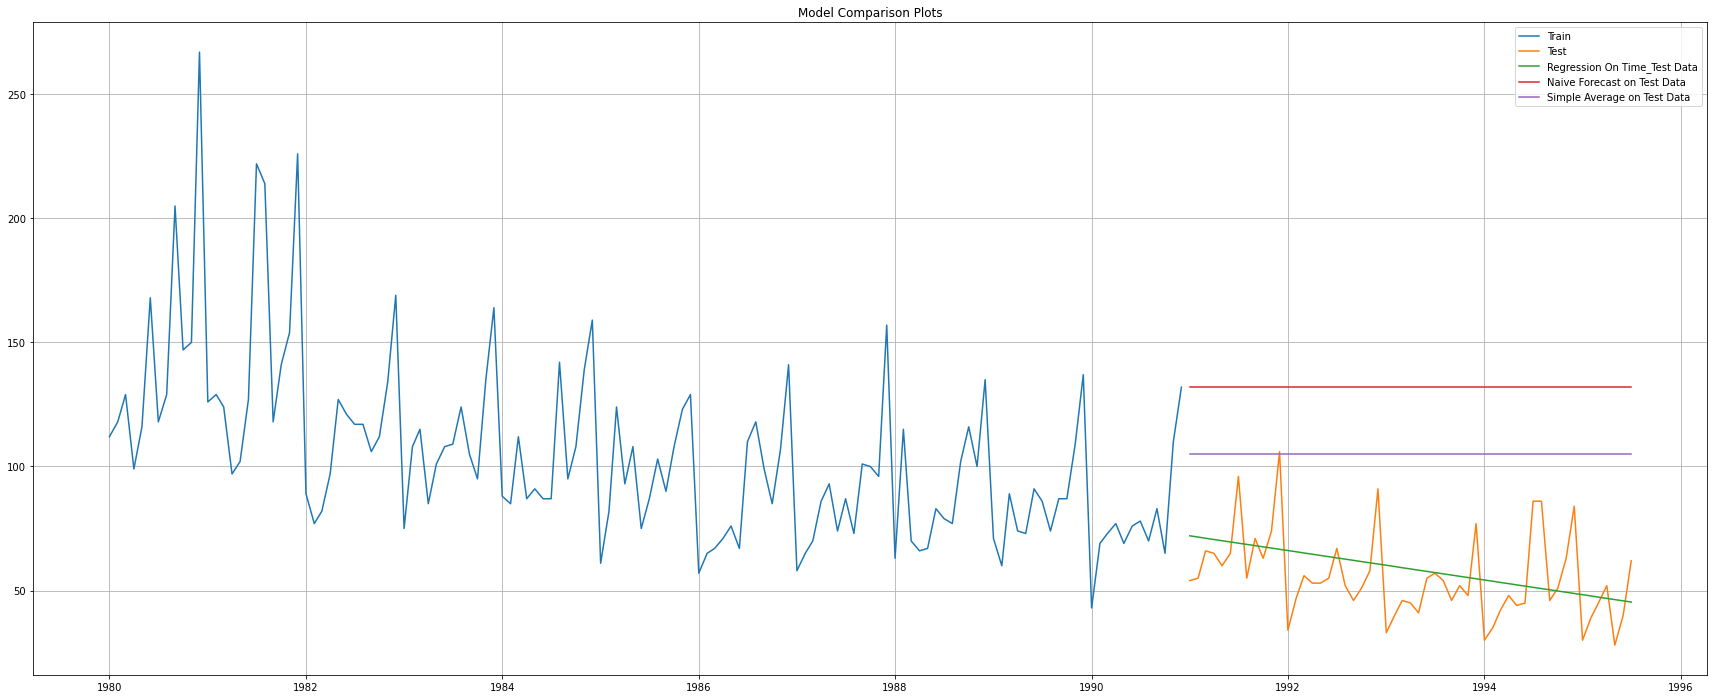

In [215]:
## Plotting on both Training and Test data

plt.figure(figsize=(30,12))
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')

plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')


plt.legend(loc='best')
plt.title("Model Comparison Plots")
plt.grid();

## Method 4: Simple Exponential Smoothing

In [216]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [217]:
SES_train = train.copy()
SES_test = test.copy()

In [218]:
SES_train.tail()

,Rose
YearMonth,
1990-08-01,70.0
1990-09-01,83.0
1990-10-01,65.0
1990-11-01,110.0
1990-12-01,132.0


In [219]:
SES_test.head()

,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


In [220]:
model_SES = SimpleExpSmoothing(SES_train['Rose']);

In [221]:
model_SES_autofit = model_SES.fit(optimized=True);

In [222]:
model_SES_autofit.params

{'smoothing_level': 0.0987493111726833,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 134.38720226208358,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [223]:
SES_train['predict'] = model_SES_autofit.fittedvalues
print(SES_train.head(),'\n')
print(SES_train.tail(),'\n')

             Rose     predict
YearMonth                    
1980-01-01  112.0  134.387202
1980-02-01  118.0  132.176481
1980-03-01  129.0  130.776564
1980-04-01   99.0  130.601129
1980-05-01  116.0  127.480539 

             Rose    predict
YearMonth                   
1990-08-01   70.0  81.577284
1990-09-01   83.0  80.434035
1990-10-01   65.0  80.687423
1990-11-01  110.0  79.138300
1990-12-01  132.0  82.185872 



In [224]:
SES_test['predict'] = model_SES_autofit.forecast(steps=len(SES_test))
SES_test.head()

,Rose,predict
YearMonth,,
1991-01-01,54.0,87.104983
1991-02-01,55.0,87.104983
1991-03-01,66.0,87.104983
1991-04-01,65.0,87.104983
1991-05-01,60.0,87.104983


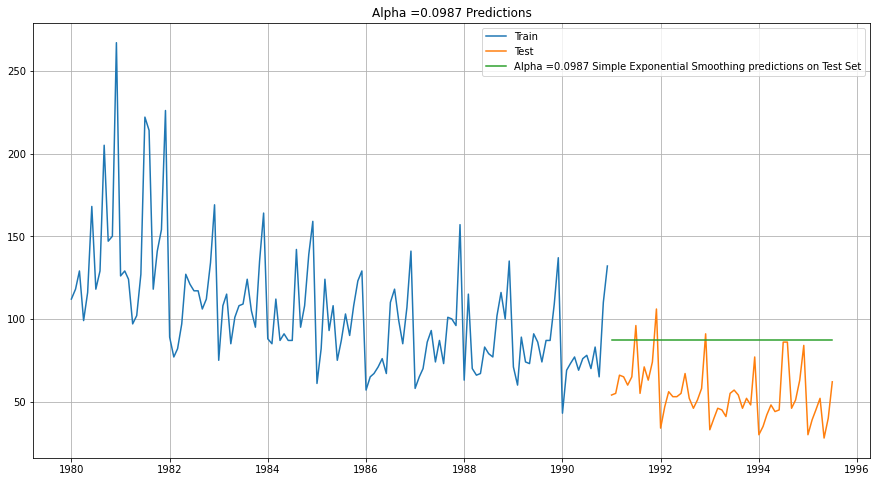

In [225]:
plt.plot(SES_train['Rose'], label='Train')
plt.plot(SES_test['Rose'], label='Test')

#plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict'], label='Alpha =0.0987 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha =0.0987 Predictions');

In [226]:
rmse_model5_train_1 = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict'])**0.5
mape_model5_train_1 = MAPE(SES_train['Rose'],SES_train['predict'])
print("For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_train_1, mape_model5_train_1))

For Alpha =0.0987 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 31.501 MAPE is 24.03


In [227]:
## Test Data

rmse_model5_test_1 = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict'])**0.5
mape_model5_test_1 = MAPE(SES_test['Rose'],SES_test['predict'])
print("For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model5_test_1, mape_model5_test_1))


For Alpha =1 Simple Exponential Smoothing Model forecast on the Training Data,  RMSE is 35.931 MAPE is 72.63


In [228]:
resultsDf_5 = pd.DataFrame({'RMSE': [rmse_model5_test_1],'MAPE': [mape_model5_test_1]}
                           ,index=['Alpha=0.0987,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_5])
resultsDf

,RMSE,MAPE
RegressionOnTime,16.626144,25.986057
NaiveModel,78.485320,159.878078
SimpleAverageModel,52.369847,106.638264
"Alpha=0.0987,SimpleExponentialSmoothing",35.931340,72.630743


In [229]:
resultsDf_6 = pd.DataFrame({'Alpha Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_6

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [230]:
# Defining a loop which iterates from 0.1 to 1 at an interval of 0.1.
model_SES = SimpleExpSmoothing(SES_train['Rose'])
for i in np.arange(0.1,1,0.1):
    # Fitting the Simple Exponential Smoothing model with different alpha values got from the defined loop above
    model_SES_alpha_i = model_SES.fit(smoothing_level=i,optimized=False)
    # Storing the predicted values of the training set in the training data frame. 
    SES_train['predict',i] = model_SES_alpha_i.fittedvalues
    # Storing the predicted values of the test set in the test data frame
    SES_test['predict',i] = model_SES_alpha_i.forecast(steps=len(test))
    
    # Evaluating the predictions on the training set using the RMSE and MAPE
    rmse_model5_train_i = metrics.mean_squared_error(SES_train['Rose'],SES_train['predict',i])**0.5
    mape_model5_train_i = MAPE(SES_train['Rose'],SES_train['predict',i])
    
    # Evaluating the predictions on the test set using the RMSE and MAPE
    rmse_model5_test_i = metrics.mean_squared_error(SES_test['Rose'],SES_test['predict',i])**0.5
    mape_model5_test_i = MAPE(SES_test['Rose'],SES_test['predict',i])
    
    # Adding all the RMSE and MAPE values for both training and test set for their corresponding alpha values.
    resultsDf_6 = resultsDf_6.append({'Alpha Values':i,'Train RMSE':rmse_model5_train_i 
                                      ,'Train MAPE': mape_model5_train_i,'Test RMSE':rmse_model5_test_i
                                      ,'Test MAPE':mape_model5_test_i}, ignore_index=True)

In [231]:
from IPython.display import display 

In [232]:
print('Training Data Frame')
display(SES_train.head())
print('Test Data Frame')
display(SES_test.head())

Training Data Frame


,Rose,predict,"(predict, 0.1)","(predict, 0.2)","(predict, 0.30000000000000004)","(predict, 0.4)","(predict, 0.5)","(predict, 0.6)","(predict, 0.7000000000000001)","(predict, 0.8)","(predict, 0.9)"
YearMonth,,,,,,,,,,,
1980-01-01,112.0,134.387202,112.000,112.000,112.000,112.000,112.0,112.000,112.000,112.000,112.000
1980-02-01,118.0,132.176481,112.000,112.000,112.000,112.000,112.0,112.000,112.000,112.000,112.000
1980-03-01,129.0,130.776564,112.600,113.200,113.800,114.400,115.0,115.600,116.200,116.800,117.400
1980-04-01,99.0,130.601129,114.240,116.360,118.360,120.240,122.0,123.640,125.160,126.560,127.840
1980-05-01,116.0,127.480539,112.716,112.888,112.552,111.744,110.5,108.856,106.848,104.512,101.884


Test Data Frame


,Rose,predict,"(predict, 0.1)","(predict, 0.2)","(predict, 0.30000000000000004)","(predict, 0.4)","(predict, 0.5)","(predict, 0.6)","(predict, 0.7000000000000001)","(predict, 0.8)","(predict, 0.9)"
YearMonth,,,,,,,,,,,
1991-01-01,54.0,87.104983,87.140177,92.096329,98.669021,105.260413,111.37647,116.88547,121.747572,125.92556,129.366777
1991-02-01,55.0,87.104983,87.140177,92.096329,98.669021,105.260413,111.37647,116.88547,121.747572,125.92556,129.366777
1991-03-01,66.0,87.104983,87.140177,92.096329,98.669021,105.260413,111.37647,116.88547,121.747572,125.92556,129.366777
1991-04-01,65.0,87.104983,87.140177,92.096329,98.669021,105.260413,111.37647,116.88547,121.747572,125.92556,129.366777
1991-05-01,60.0,87.104983,87.140177,92.096329,98.669021,105.260413,111.37647,116.88547,121.747572,125.92556,129.366777


In [233]:
resultsDf_6

,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,31.815610,23.606571,35.962469,72.696085
1,0.2,31.979391,23.286377,40.412892,81.941632
2,0.3,32.470164,23.473206,46.473062,94.508428
3,0.4,33.035130,23.706134,52.674062,107.259264
4,0.5,33.682839,23.935715,58.504281,119.275023
5,0.6,34.441171,24.209480,63.801646,130.120995
6,0.7,35.323261,24.498609,68.504704,139.693372
7,0.8,36.334596,24.976569,72.562777,147.918883
8,0.9,37.482782,25.677426,75.914996,154.693860


In [234]:
print('Sorting the Values by the RMSE on the test set')
display(resultsDf_6.sort_values(by='Test RMSE').head())
print('Sorting the Values by the MAPE on the test set')
display(resultsDf_6.sort_values(by='Test MAPE').head())

Sorting the Values by the RMSE on the test set


,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,31.815610,23.606571,35.962469,72.696085
1,0.2,31.979391,23.286377,40.412892,81.941632
2,0.3,32.470164,23.473206,46.473062,94.508428
3,0.4,33.035130,23.706134,52.674062,107.259264
4,0.5,33.682839,23.935715,58.504281,119.275023


Sorting the Values by the MAPE on the test set


,Alpha Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,31.815610,23.606571,35.962469,72.696085
1,0.2,31.979391,23.286377,40.412892,81.941632
2,0.3,32.470164,23.473206,46.473062,94.508428
3,0.4,33.035130,23.706134,52.674062,107.259264
4,0.5,33.682839,23.935715,58.504281,119.275023


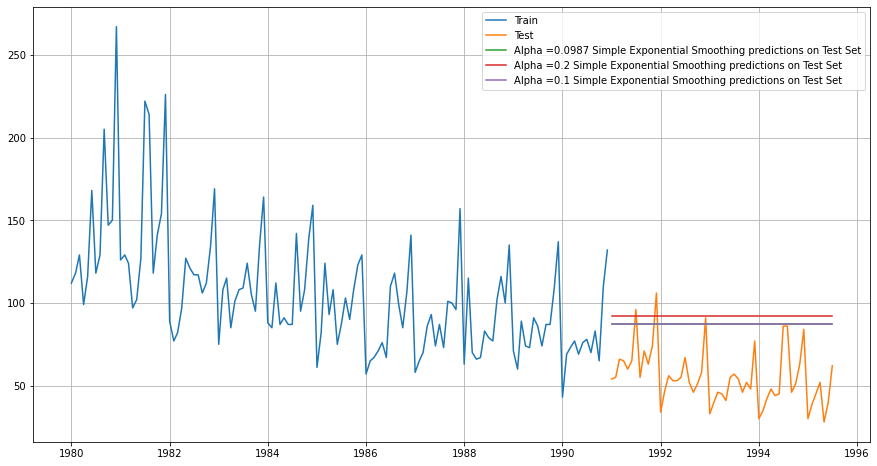

In [235]:
# Plotting the actual training data
plt.plot(SES_train['Rose'], label='Train')
# Plotting the actual test data
plt.plot(SES_test['Rose'], label='Test')

# Plotting the predicted training data with Alpha=1
#plt.plot(SES_train['predict'], label='Alpha =1 Simple Exponential Smoothing predictions on Training Set')
# Plotting the predicted test data with Alpha=1
plt.plot(SES_test['predict'], label='Alpha =0.0987 Simple Exponential Smoothing predictions on Test Set')

# Plotting the predicted training data with Alpha=0.2 (best prediction in terms of RMSE and MAPE on the test data)
#plt.plot(SES_train['predict', 0.2], label='Alpha =0.3 Simple Exponential Smoothing predictions on Training Set')
# Plotting the predicted training data with Alpha=0.2 (best prediction in terms of RMSE and MAPE on the test data)
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')

# Plotting the predicted training data with Alpha=0.1 (second best prediction in terms of RMSE and MAPE on the test data)
#plt.plot(SES_train['predict', 0.1], label='Alpha =0.4 Simple Exponential Smoothing predictions on Training Set')
# Plotting the predicted test data with Alpha=0.1 (second best prediction in terms of RMSE and MAPE on the test data)
plt.plot(SES_test['predict', 0.1], label='Alpha =0.1 Simple Exponential Smoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [236]:
resultsDf_6_1 = pd.DataFrame({'RMSE': [resultsDf_6['Test RMSE'][1],resultsDf_6['Test RMSE'][0]]
                            ,'MAPE': [resultsDf_6['Test MAPE'][1],resultsDf_6['Test MAPE'][0]]}
                           ,index=['Alpha=0.2,SimpleExponentialSmoothing','Alpha=0.1,SimpleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_6_1])
resultsDf

,RMSE,MAPE
RegressionOnTime,16.626144,25.986057
NaiveModel,78.485320,159.878078
SimpleAverageModel,52.369847,106.638264
"Alpha=0.0987,SimpleExponentialSmoothing",35.931340,72.630743
"Alpha=0.2,SimpleExponentialSmoothing",40.412892,81.941632
"Alpha=0.1,SimpleExponentialSmoothing",35.962469,72.696085


## Method 5: Double Exponential Smoothing (Holt's Model)

In [237]:
DES_train = train.copy()
DES_test = test.copy()

In [238]:
model_DES = Holt(DES_train['Rose'])

In [239]:
model_DES_autofit = model_DES.fit(optimized=True)

In [240]:
model_DES_autofit.params

{'smoothing_level': 0.017549790270679714,
 'smoothing_trend': 3.236153800377395e-05,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 138.82081494774005,
 'initial_trend': -0.492580228245491,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [241]:
DES_train['predict'] = model_SES_autofit.fittedvalues
print(DES_train.head(),'\n')
print(DES_train.tail(),'\n')

             Rose     predict
YearMonth                    
1980-01-01  112.0  134.387202
1980-02-01  118.0  132.176481
1980-03-01  129.0  130.776564
1980-04-01   99.0  130.601129
1980-05-01  116.0  127.480539 

             Rose    predict
YearMonth                   
1990-08-01   70.0  81.577284
1990-09-01   83.0  80.434035
1990-10-01   65.0  80.687423
1990-11-01  110.0  79.138300
1990-12-01  132.0  82.185872 



In [242]:
DES_test['predict'] = model_DES_autofit.forecast(steps=len(SES_test))
DES_test.head()

,Rose,predict
YearMonth,,
1991-01-01,54.0,73.259732
1991-02-01,55.0,72.767150
1991-03-01,66.0,72.274569
1991-04-01,65.0,71.781987
1991-05-01,60.0,71.289405


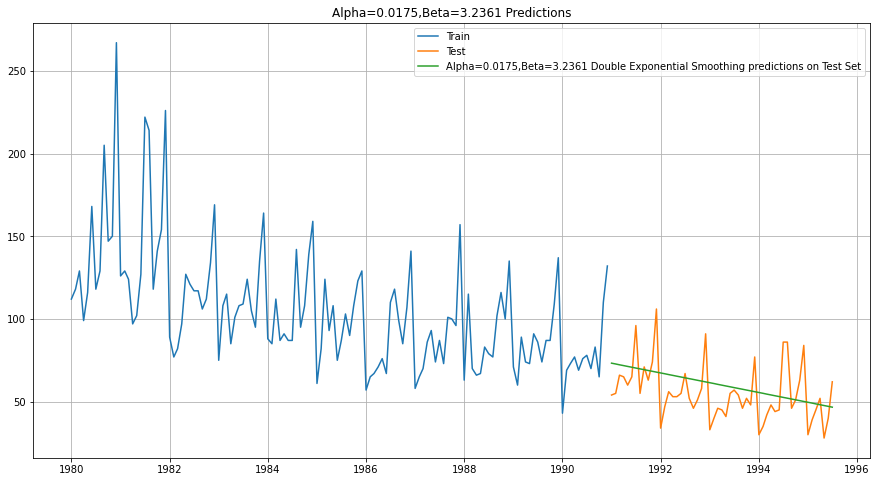

In [243]:
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

#plt.plot(DES_train['predict'], label='Alpha=1,Beta=0 Double Exponential Smoothing predictions on Training Set')
plt.plot(DES_test['predict'], label='Alpha=0.0175,Beta=3.2361 Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha=0.0175,Beta=3.2361 Predictions');

In [244]:
resultsDf_7 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [245]:
for i in np.arange(0.1,1.1,0.1): #Defining the alpha values from this loop
    for j in np.arange(0.1,1.1,0.1): #Defining the beta values from this loop
# We have defined a nested loop. This means one loop inside another. Here, due to this loop Python is going to fit the
# the Double Exponential model by varying different alpha and beta parameters. The way Python runs these set of loops is
# it fixes the value of 'i' (which is alpha) and varies all the values of 'j' (which is beta).

        # Fitting the Double Exponential Smoothing model with appropriate i and j values from the loop
        model_DES_alpha_i_j = model_DES.fit(smoothing_level=i,smoothing_slope=j,optimized=False)
        # Predicting on the training set
        DES_train['predict',i,j] = model_DES_alpha_i_j.fittedvalues
        # Predicting on the training set
        DES_test['predict',i,j] = model_DES_alpha_i_j.forecast(steps=len(DES_test))
        
        # Model Evaluation using RMSE and MAPE on for the training data predictions
        rmse_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict',i,j])**0.5
        mape_model6_train = MAPE(DES_train['Rose'],DES_train['predict',i,j])
        
        # Model Evaluation using RMSE and MAPE on for the test data predictions
        rmse_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict',i,j])**0.5
        mape_model6_test = MAPE(DES_test['Rose'],DES_test['predict',i,j])
        
        # Putting all the model evaluation results into one data frame with their corresponding alpha and beta values
        resultsDf_7 = resultsDf_7.append({'Alpha Values':i,'Beta Values':j,'Train RMSE':rmse_model6_train
                                      ,'Train MAPE': mape_model6_train,'Test RMSE':rmse_model6_test
                                      ,'Test MAPE':mape_model6_test}, ignore_index=True)

In [246]:
print('Training Data Frame')
display(DES_train.head())
print('Test Data Frame')
display(DES_test.head())

Training Data Frame


,Rose,predict,"(predict, 0.1, 0.1)","(predict, 0.1, 0.2)","(predict, 0.1, 0.30000000000000004)","(predict, 0.1, 0.4)","(predict, 0.1, 0.5)","(predict, 0.1, 0.6)","(predict, 0.1, 0.7000000000000001)","(predict, 0.1, 0.8)",...,"(predict, 1.0, 0.1)","(predict, 1.0, 0.2)","(predict, 1.0, 0.30000000000000004)","(predict, 1.0, 0.4)","(predict, 1.0, 0.5)","(predict, 1.0, 0.6)","(predict, 1.0, 0.7000000000000001)","(predict, 1.0, 0.8)","(predict, 1.0, 0.9)","(predict, 1.0, 1.0)"
YearMonth,,,,,,,,,,,,,,,,,,,,,
1980-01-01,112.0,134.387202,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,...,118.0000,118.0000,118.0000,118.0000,118.000,118.0000,118.0000,118.0000,118.0000,118.0
1980-02-01,118.0,132.176481,123.340000,123.280000,123.220000,123.160000,123.100000,123.040000,122.980000,122.920000,...,117.4000,116.8000,116.2000,115.6000,115.000,114.4000,113.8000,113.2000,112.6000,112.0
1980-03-01,129.0,130.776564,128.692600,128.526400,128.361400,128.197600,128.035000,127.873600,127.713400,127.554400,...,123.4600,123.0400,122.7400,122.5600,122.500,122.5600,122.7400,123.0400,123.4600,124.0
1980-04-01,99.0,130.601129,134.613014,134.357632,134.107818,133.863536,133.624750,133.391424,133.163522,132.941008,...,135.0140,135.2320,135.6180,136.1360,136.750,137.4240,138.1220,138.8080,139.4460,140.0
1980-05-01,116.0,127.480539,136.585256,135.898588,135.226360,134.568337,133.924287,133.293980,132.677185,132.073675,...,101.4126,97.9856,94.6326,91.2816,87.875,84.3696,80.7366,76.9616,73.0446,69.0


Test Data Frame


,Rose,predict,"(predict, 0.1, 0.1)","(predict, 0.1, 0.2)","(predict, 0.1, 0.30000000000000004)","(predict, 0.1, 0.4)","(predict, 0.1, 0.5)","(predict, 0.1, 0.6)","(predict, 0.1, 0.7000000000000001)","(predict, 0.1, 0.8)",...,"(predict, 1.0, 0.1)","(predict, 1.0, 0.2)","(predict, 1.0, 0.30000000000000004)","(predict, 1.0, 0.4)","(predict, 1.0, 0.5)","(predict, 1.0, 0.6)","(predict, 1.0, 0.7000000000000001)","(predict, 1.0, 0.8)","(predict, 1.0, 0.9)","(predict, 1.0, 1.0)"
YearMonth,,,,,,,,,,,,,,,,,,,,,
1991-01-01,54.0,73.259732,83.866218,81.272870,82.259346,82.476267,82.238451,82.424266,83.741435,84.760120,...,136.984430,141.975918,146.284705,149.826392,152.623530,154.671795,155.922332,156.297759,155.699004,154.0
1991-02-01,55.0,72.767150,83.977090,81.875325,83.810183,84.717867,85.284392,86.527792,88.982372,90.891769,...,141.968861,151.951835,160.569410,167.652783,173.247060,177.343590,179.844664,180.595518,179.398007,176.0
1991-03-01,66.0,72.274569,84.087961,82.477781,85.361020,86.959467,88.330333,90.631319,94.223309,97.023418,...,146.953291,161.927753,174.854115,185.479175,193.870590,200.015385,203.766996,204.893277,203.097011,198.0
1991-04-01,65.0,71.781987,84.198833,83.080236,86.911857,89.201067,91.376274,94.734845,99.464246,103.155066,...,151.937721,171.903671,189.138820,203.305567,214.494119,222.687180,227.689328,229.191036,226.796014,220.0
1991-05-01,60.0,71.289405,84.309705,83.682691,88.462694,91.442667,94.422215,98.838371,104.705183,109.286715,...,156.922151,181.879588,203.423526,221.131958,235.117649,245.358975,251.611660,253.488795,250.495018,242.0


In [247]:
resultsDf_7

,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,0.1,34.439111,25.631039,36.001371,72.706377
1,0.1,0.2,33.450729,25.296081,47.428354,95.053143
2,0.1,0.3,33.145789,25.184874,76.587890,149.878693
3,0.1,0.4,33.262191,25.365635,97.913261,188.898983
4,0.1,0.5,33.688415,25.589999,122.528037,233.826127
...,...,...,...,...,...,...
95,1.0,0.6,51.831610,38.601881,799.744519,1484.142211
96,1.0,0.7,54.497039,40.680079,839.954171,1557.186337
97,1.0,0.8,57.365879,42.855429,852.026374,1579.115100
98,1.0,0.9,60.474309,45.161334,832.772996,1544.141677


In [248]:
print('Sorting the Values by the RMSE on the test set')
display(resultsDf_7.sort_values(by='Test RMSE').head())
print('Sorting the Values by the MAPE on the test set')
display(resultsDf_7.sort_values(by='Test MAPE').head())

Sorting the Values by the RMSE on the test set


,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,0.1,34.439111,25.631039,36.001371,72.706377
1,0.1,0.2,33.450729,25.296081,47.428354,95.053143
10,0.2,0.1,33.097427,24.676654,64.312204,128.763068
2,0.1,0.3,33.145789,25.184874,76.587890,149.878693
20,0.3,0.1,33.611269,24.923014,97.053293,192.036813


Sorting the Values by the MAPE on the test set


,Alpha Values,Beta Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,0.1,34.439111,25.631039,36.001371,72.706377
1,0.1,0.2,33.450729,25.296081,47.428354,95.053143
10,0.2,0.1,33.097427,24.676654,64.312204,128.763068
2,0.1,0.3,33.145789,25.184874,76.587890,149.878693
3,0.1,0.4,33.262191,25.365635,97.913261,188.898983


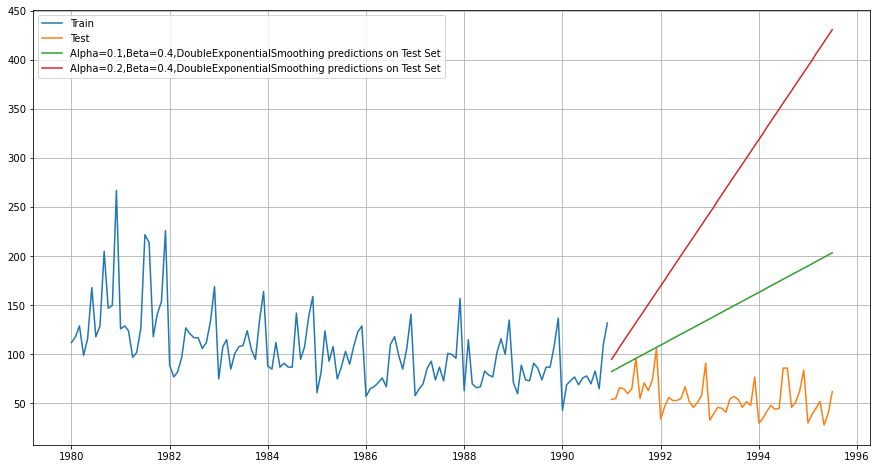

In [249]:
plt.plot(DES_train['Rose'], label='Train')
plt.plot(DES_test['Rose'], label='Test')

#plt.plot(DES_train['predict', 0.1, 0.4], label='Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.1, 0.4], label='Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing predictions on Test Set')

#plt.plot(DES_train['predict', 0.2, 0.4], label='Alpha=0.2,Beta=0.4,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.2, 0.4], label='Alpha=0.2,Beta=0.4,DoubleExponentialSmoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [250]:
resultsDf_7_1 = pd.DataFrame({'RMSE': [resultsDf_7['Test RMSE'][3],resultsDf_7['Test RMSE'][10]],
                              'MAPE':[resultsDf_7['Test MAPE'][3],resultsDf_7['Test MAPE'][10]]}
                           ,index=['Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing','Alpha=0.2,Beta=0.4,DoubleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_7_1])
resultsDf

,RMSE,MAPE
RegressionOnTime,16.626144,25.986057
NaiveModel,78.485320,159.878078
SimpleAverageModel,52.369847,106.638264
"Alpha=0.0987,SimpleExponentialSmoothing",35.931340,72.630743
"Alpha=0.2,SimpleExponentialSmoothing",40.412892,81.941632
"Alpha=0.1,SimpleExponentialSmoothing",35.962469,72.696085
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",97.913261,188.898983
"Alpha=0.2,Beta=0.4,DoubleExponentialSmoothing",64.312204,128.763068


## Method 6: Triple Exponential Smoothing (Holt - Winter's Model)

In [251]:
TES_train = train.copy()
TES_test = test.copy()

In [252]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [253]:
model_TES = ExponentialSmoothing(TES_train['Rose'],seasonal='mul',seasonal_periods=12)

In [254]:
model_TES_autofit = model_TES.fit(optimized=True)

In [255]:
model_TES_autofit.params

{'smoothing_level': 0.16071482768729783,
 'smoothing_trend': nan,
 'smoothing_seasonal': 2.4424267597599e-07,
 'damping_trend': nan,
 'initial_level': 57.99324559668776,
 'initial_trend': nan,
 'initial_seasons': array([1.83865042, 2.07349259, 2.25365825, 1.99531029, 2.22177086,
        2.37142594, 2.60344008, 2.77973484, 2.58945456, 2.55916426,
        2.95178456, 3.99448442]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [256]:
TES_train['auto_predict'] = model_TES_autofit.fittedvalues
TES_train.head()

,Rose,auto_predict
YearMonth,,
1980-01-01,112.0,106.629305
1980-02-01,118.0,121.221961
1980-03-01,129.0,131.192121
1980-04-01,99.0,115.841001
1980-05-01,116.0,125.974752


In [257]:
TES_test['auto_predict'] = model_TES_autofit.forecast(steps=len(TES_test))
TES_test.head()

,Rose,auto_predict
YearMonth,,
1991-01-01,54.0,58.497511
1991-02-01,55.0,65.969133
1991-03-01,66.0,71.701187
1991-04-01,65.0,63.481729
1991-05-01,60.0,70.686672


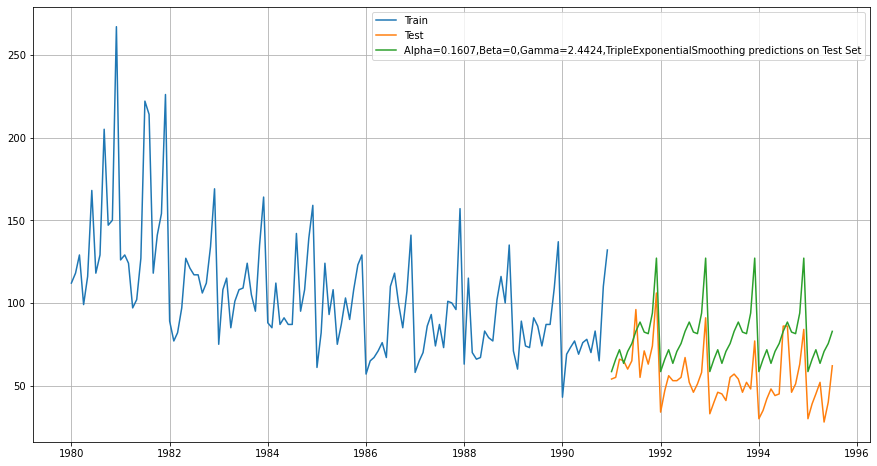

In [258]:
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')

plt.plot(TES_test['auto_predict'], label='Alpha=0.1607,Beta=0,Gamma=2.4424,TripleExponentialSmoothing predictions on Test Set')


plt.legend(loc='best')
plt.grid();

In [259]:
rmse_model6_train_1 = metrics.mean_squared_error(TES_train['Rose'],TES_train['auto_predict'])**0.5
mape_model6_train_1 = MAPE(TES_train['Rose'],TES_train['auto_predict'])
print('For Alpha=0.1607,Beta=0,Gamma=2.4424, Triple Exponential Smoothing Model forecast on the Training Data'  '\nRMSE is %3.3f MAPE is %3.2f' %(rmse_model6_train_1, mape_model6_train_1))

For Alpha=0.1607,Beta=0,Gamma=2.4424, Triple Exponential Smoothing Model forecast on the Training Data
RMSE is 18.810 MAPE is 13.93


In [260]:
## Test Data

rmse_model6_test_1 = metrics.mean_squared_error(TES_test['Rose'],TES_test['auto_predict'])**0.5
mape_model6_test_1 = MAPE(TES_test['Rose'],TES_test['auto_predict'])
print('For Alpha=0.1607,Beta=0,Gamma=2.4424, Triple Exponential Smoothing Model forecast on the Training Data'  '\nRMSE is %3.3f MAPE is %3.2f' %(rmse_model6_test_1, mape_model6_test_1))

For Alpha=0.1607,Beta=0,Gamma=2.4424, Triple Exponential Smoothing Model forecast on the Training Data
RMSE is 26.717 MAPE is 49.81


In [261]:
resultsDf_8_1 = pd.DataFrame({'RMSE': [rmse_model6_test_1],'MAPE':[mape_model6_test_1]}
                           ,index=['Alpha=0.1607,Beta=0,Gamma=2.4424,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_1])
resultsDf

,RMSE,MAPE
RegressionOnTime,16.626144,25.986057
NaiveModel,78.485320,159.878078
SimpleAverageModel,52.369847,106.638264
"Alpha=0.0987,SimpleExponentialSmoothing",35.931340,72.630743
"Alpha=0.2,SimpleExponentialSmoothing",40.412892,81.941632
"Alpha=0.1,SimpleExponentialSmoothing",35.962469,72.696085
"Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing",97.913261,188.898983
"Alpha=0.2,Beta=0.4,DoubleExponentialSmoothing",64.312204,128.763068
"Alpha=0.1607,Beta=0,Gamma=2.4424,TripleExponentialSmoothing",26.717017,49.805738


In [262]:
resultsDf_8_2 = pd.DataFrame({'Alpha Values':[],'Beta Values':[],'Gamma Values':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE


In [263]:
for i in np.arange(0.1,1.1,0.1): #Defining the alpha values from the loop
    for j in np.arange(0.1,1.1,0.1): #Defining the beta values from the loop
        for k in np.arange(0.1,1.1,0.1): #Defining the gamma values from the loop
# We have defined a nested loop. This means one loop inside another. Here, due to this loop Python is going to fit 
# the Triple Exponential model by varying different alpha and beta parameters. 


            model_TES_alpha_i_j_k = model_TES.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=False)
            TES_train['predict',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(TES_test))
        
            rmse_model8_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict',i,j,k])**0.5
            mape_model8_train = MAPE(TES_train['Rose'],TES_train['predict',i,j,k])
        
            rmse_model8_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict',i,j,k])**0.5
            mape_model8_test = MAPE(TES_test['Rose'],TES_test['predict',i,j,k])
        
            resultsDf_8_2 = resultsDf_8_2.append({'Alpha Values':i,'Beta Values':j,'Gamma Values':k,'Train RMSE':rmse_model8_train
                                      ,'Train MAPE': mape_model8_train,'Test RMSE':rmse_model8_test
                                      ,'Test MAPE':mape_model8_test}, ignore_index=True)

In [264]:
resultsDf_8_2

,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
0,0.1,0.1,0.1,25.884321,16.607223,28.443415,51.718560
1,0.1,0.1,0.2,24.283181,15.800656,27.326180,50.238651
2,0.1,0.1,0.3,23.627519,15.690900,27.021847,49.553257
3,0.1,0.1,0.4,23.420969,15.680162,26.902047,49.025843
4,0.1,0.1,0.5,23.491086,15.685875,26.839518,48.524452
...,...,...,...,...,...,...,...
995,1.0,1.0,0.6,35.235751,23.918659,54.299806,94.363158
996,1.0,1.0,0.7,37.848287,26.241587,61.187305,103.378628
997,1.0,1.0,0.8,41.864791,29.696348,75.664615,123.819000
998,1.0,1.0,0.9,49.078071,33.902487,96.109727,152.399038


In [265]:
print('Sorting the values with respect to RMSE:')
display(resultsDf_8_2.sort_values(by=['Test RMSE']).head())
print('Sorting the values with respect to MAPE:')
display(resultsDf_8_2.sort_values(by=['Test MAPE']).head())

Sorting the values with respect to RMSE:


,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
399,0.4,1.0,1.0,30.467835,19.898203,24.112094,36.657238
329,0.4,0.3,1.0,30.467835,19.898203,24.112094,36.657238
339,0.4,0.4,1.0,30.467835,19.898203,24.112094,36.657238
349,0.4,0.5,1.0,30.467835,19.898203,24.112094,36.657238
359,0.4,0.6,1.0,30.467835,19.898203,24.112094,36.657238


Sorting the values with respect to MAPE:


,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
499,0.5,1.0,1.0,32.224609,21.023927,24.162174,34.554878
479,0.5,0.8,1.0,32.224609,21.023927,24.162174,34.554878
469,0.5,0.7,1.0,32.224609,21.023927,24.162174,34.554878
459,0.5,0.6,1.0,32.224609,21.023927,24.162174,34.554878
449,0.5,0.5,1.0,32.224609,21.023927,24.162174,34.554878


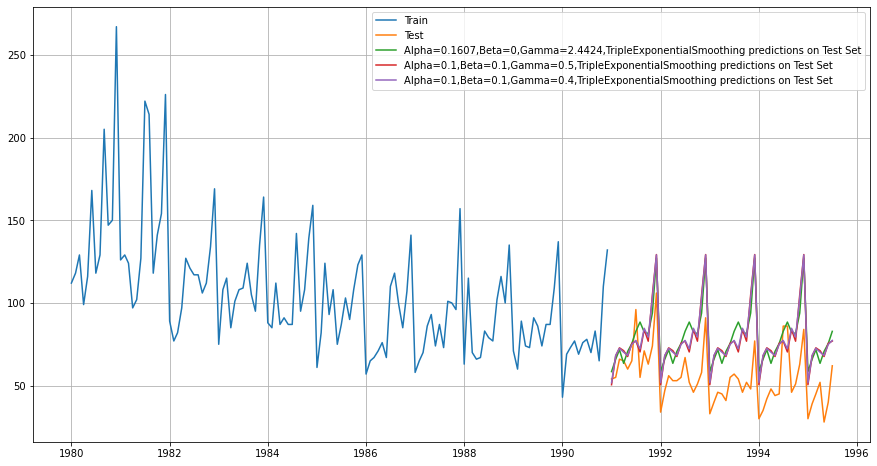

In [323]:
## Plotting on both the Training and Test data using brute force alpha, beta and gamma determination

## Plotting the actual training and test data
plt.plot(TES_train['Rose'], label='Train')
plt.plot(TES_test['Rose'], label='Test')


plt.plot(TES_test['auto_predict'], label='Alpha=0.1607,Beta=0,Gamma=2.4424,TripleExponentialSmoothing predictions on Test Set')



plt.plot(TES_test['predict', 0.1, 0.1, 0.5], label='Alpha=0.1,Beta=0.1,Gamma=0.5,TripleExponentialSmoothing predictions on Test Set')


plt.plot(TES_test['predict', 0.1, 0.1, 0.4], label='Alpha=0.1,Beta=0.1,Gamma=0.4,TripleExponentialSmoothing predictions on Test Set')



plt.legend(loc='best')
plt.grid();

In [324]:
resultsDf_8_3 = pd.DataFrame({'RMSE': [resultsDf_8_2['Test RMSE'][4],resultsDf_8_2['Test RMSE'][3]],
                              'MAPE':[resultsDf_8_2['Test MAPE'][4],resultsDf_8_2['Test MAPE'][3]]}
                           ,index=['Alpha=0.1607,Beta=0,Gamma=2.4424,TripleExponentialSmoothing',
                                  'Alpha=0.1607,Beta=0,Gamma=2.4424,TripleExponentialSmoothing'])

resultsDf = pd.concat([resultsDf, resultsDf_8_3])
resultsDf

,RMSE,MAPE,Alpha Values,Beta Values,Gamma Values,Train RMSE,Train MAPE,Test RMSE,Test MAPE
"ARIMA(2,1,2)",1296.494615,72.776626,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"ARIMA(1,1,2)",1337.554676,73.927957,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"SARIMA(1,1,2)(2,0,2,12)",26.560135,53.290208,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"SARIMA(1,0,2)(1,1,1,12)",29.462694,52.988401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"SARIMA(1,0,2)(1,1,1,12)",29.462694,52.988401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
"SARIMA(1,0,2)(1,1,1,12)",29.462694,52.988401,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Alpha=0.1607,Beta=0,Gamma=2.4424,TripleExponentialSmoothing",26.839518,48.524452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Alpha=0.1607,Beta=0,Gamma=2.4424,TripleExponentialSmoothing",26.902047,49.025843,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Alpha=0.1607,Beta=0,Gamma=2.4424,TripleExponentialSmoothing",26.839518,48.524452,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [378]:
print('Sorted by RMSE values on the Test Data:')
display(resultsDf.sort_values(by=['RMSE']))
print('Sorted by MAPE values on the Test Data:')
display(resultsDf.sort_values(by=['MAPE']))

Sorted by RMSE values on the Test Data:


,RMSE,MAPE
"SARIMA(1,1,2)(2,0,2,12)",26.560135,53.290208
"SARIMA(1,0,2)(1,1,1,12)",29.462694,52.988401
"ARIMA(2,1,2)",1296.494615,72.776626
"ARIMA(1,1,2)",1337.554676,73.927957


Sorted by MAPE values on the Test Data:


,RMSE,MAPE
"SARIMA(1,0,2)(1,1,1,12)",29.462694,52.988401
"SARIMA(1,1,2)(2,0,2,12)",26.560135,53.290208
"ARIMA(2,1,2)",1296.494615,72.776626
"ARIMA(1,1,2)",1337.554676,73.927957


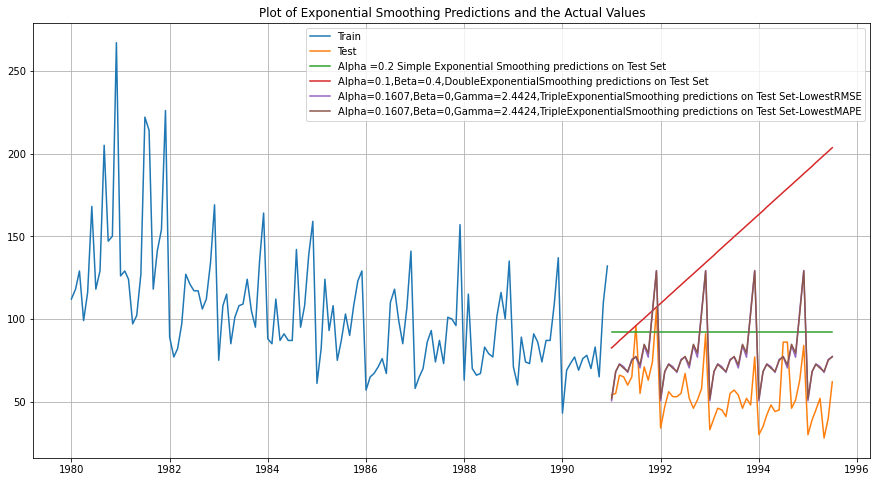

In [326]:
plt.plot(train['Rose'], label='Train')
plt.plot(test['Rose'], label='Test')

# Plotting the best Simple Exponential Smoothing Model
#plt.plot(SES_train['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Training Set')
plt.plot(SES_test['predict', 0.2], label='Alpha =0.2 Simple Exponential Smoothing predictions on Test Set')

# Plotting the best Double Exponential Smoothing Model
#plt.plot(DES_train['predict', 0.1, 0.4], label='Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing predictions on Training Set')
plt.plot(DES_test['predict', 0.1, 0.4], label='Alpha=0.1,Beta=0.4,DoubleExponentialSmoothing predictions on Test Set')

# Plotting the best Triple Exponential Smoothing Model according to the lowest RMSE
#plt.plot(TES_train['predict', 0.1, 0.1, 0.5], label='Alpha=0.1,Beta=0.1,Gamma=0.5,TripleExponentialSmoothing predictions on Training Set-LowestRMSE')
plt.plot(TES_test['predict', 0.1, 0.1, 0.5], label='Alpha=0.1607,Beta=0,Gamma=2.4424,TripleExponentialSmoothing predictions on Test Set-LowestRMSE')

# Plotting the best Triple Exponential Smoothing Model according to the lowest MAPE
#plt.plot(TES_train['predict', 0.1, 0.1, 0.4], label='Alpha=0.1,Beta=0.1,Gamma=0.4,TripleExponentialSmoothing predictions on Training Set-LowestMAPE')
plt.plot(TES_test['predict', 0.1, 0.1, 0.4], label='Alpha=0.1607,Beta=0,Gamma=2.4424,TripleExponentialSmoothing predictions on Test Set-LowestMAPE')


plt.legend(loc='best')
plt.grid();
plt.title('Plot of Exponential Smoothing Predictions and the Actual Values');

### Model 1 - Building on the Full Data

In [327]:
final_model_fullmodel1 = ExponentialSmoothing(Rose['Rose'],seasonal='mul',seasonal_periods=12)

fullmodel1=final_model_fullmodel1.fit(smoothing_level=0.7368,smoothing_slope=0.1,smoothing_seasonal=0.2631)

In [328]:
RMSE_fullmodel1 = metrics.mean_squared_error(Rose['Rose'],fullmodel1.fittedvalues)**0.5
MAPE_fullmodel1 = MAPE(Rose['Rose'],fullmodel1.fittedvalues)

print('RMSE:',RMSE_fullmodel1,'\nMAPE:',MAPE_fullmodel1)

RMSE: 21.717675838652827 
MAPE: 16.301026847713857


In [329]:
prediction_1 = fullmodel1.forecast(steps=len(test))

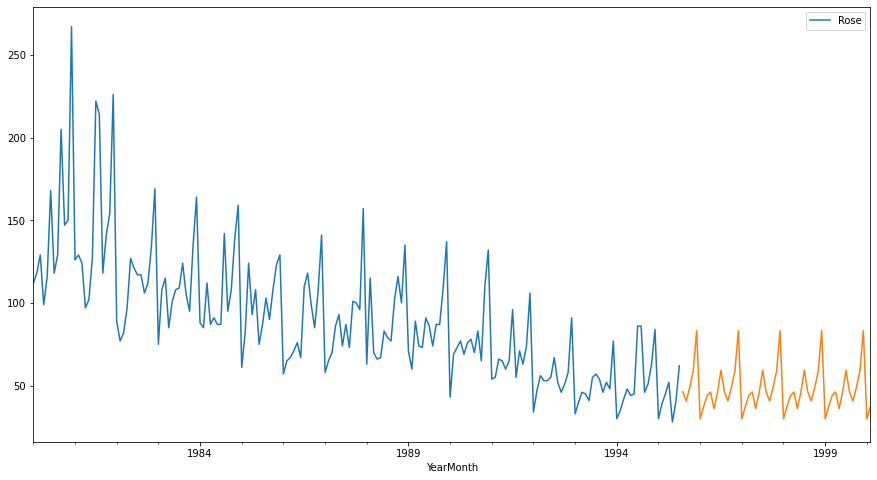

In [330]:
Rose.plot()
prediction_1.plot();

In [331]:
1.96*np.std(fullmodel1.resid)

42.52278472051362

In [332]:
pred_1_df = pd.DataFrame({'lower_CI':prediction_1 - 1.96*np.std(fullmodel1.resid,ddof=1),
                          'prediction':prediction_1,
                          'upper_ci': prediction_1 + 1.96*np.std(fullmodel1.resid,ddof=1)})
pred_1_df.head()

,lower_CI,prediction,upper_ci
1995-08-01,3.585830,46.222771,88.859711
1995-09-01,-1.951571,40.685369,83.322309
1995-10-01,6.333800,48.970740,91.607680
1995-11-01,15.977618,58.614558,101.251498
1995-12-01,40.579275,83.216215,125.853155


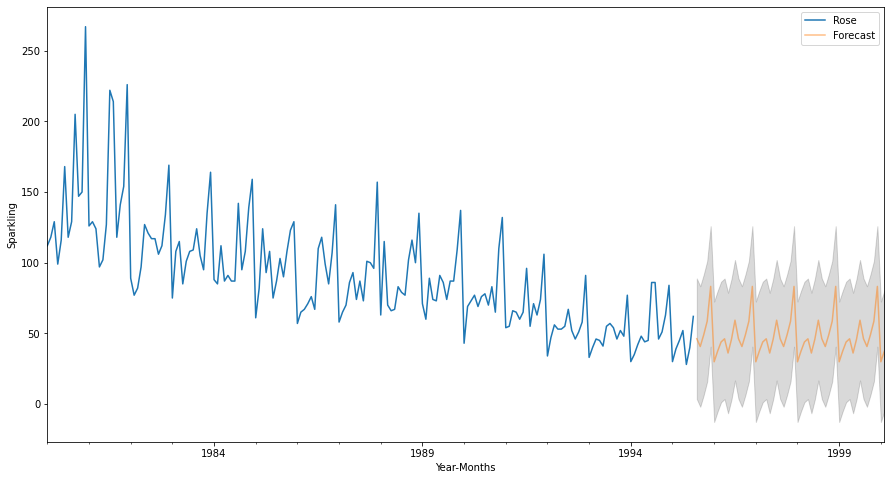

In [333]:
axis = Rose.plot(label='Actual', figsize=(15,8))
pred_1_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_1_df.index, pred_1_df['lower_CI'], pred_1_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

## Check for stationarity of the whole Time Series data.

In [334]:
from statsmodels.tsa.stattools import adfuller
Rose.head()

,Rose
YearMonth,
1980-01-01,112.0
1980-02-01,118.0
1980-03-01,129.0
1980-04-01,99.0
1980-05-01,116.0


In [335]:
dftest = adfuller(Rose['Rose'].values)
print('DF test p-value is' ,dftest[1])

DF test p-value is 0.31667540299922153


In [336]:
dftest = adfuller(Rose['Rose'].diff(1).dropna())
print('DF test p-value is' ,dftest[1])

DF test p-value is 4.443288233296963e-12


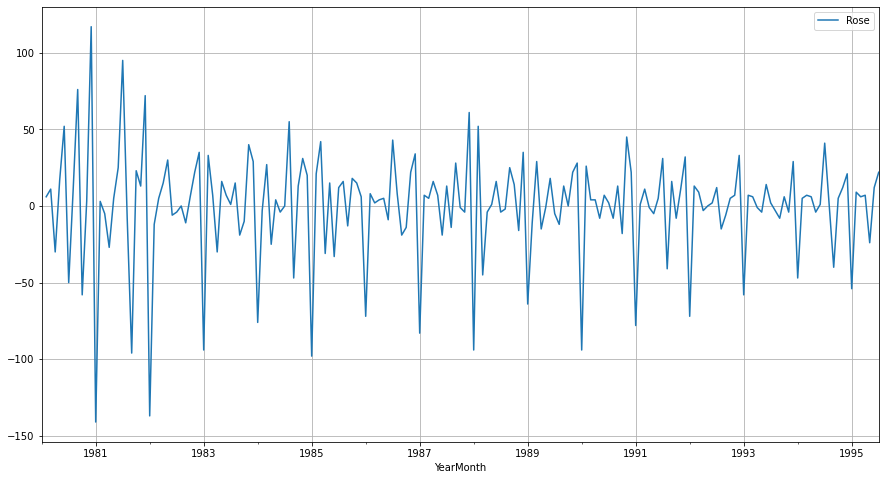

In [337]:
Rose.diff(1).plot(grid=True);

In [338]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [339]:
from matplotlib import pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

In [340]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [341]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

,param,AIC


In [342]:
for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Rose'],order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:1333.1546729124348
ARIMA(0, 1, 1) - AIC:1282.3098319748312
ARIMA(0, 1, 2) - AIC:1279.6715288535818
ARIMA(1, 1, 0) - AIC:1317.3503105381492
ARIMA(1, 1, 1) - AIC:1280.5742295380032
ARIMA(1, 1, 2) - AIC:1279.870723423191
ARIMA(2, 1, 0) - AIC:1298.6110341605004
ARIMA(2, 1, 1) - AIC:1281.5078621868474
ARIMA(2, 1, 2) - AIC:1281.8707222264284


In [343]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

,param,AIC
2,"(0, 1, 2)",1279.671529
5,"(1, 1, 2)",1279.870723
4,"(1, 1, 1)",1280.574230
7,"(2, 1, 1)",1281.507862
8,"(2, 1, 2)",1281.870722
1,"(0, 1, 1)",1282.309832
6,"(2, 1, 0)",1298.611034
3,"(1, 1, 0)",1317.350311
0,"(0, 1, 0)",1333.154673


In [344]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -635.935
Date:                Wed, 20 Oct 2021   AIC                           1281.871
Time:                        22:11:53   BIC                           1296.247
Sample:                    01-01-1980   HQIC                          1287.712
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4540      0.469     -0.969      0.333      -1.372       0.464
ar.L2          0.0001      0.170      0.001      0.999      -0.334       0.334
ma.L1         -0.2541      0.459     -0.554      0.5

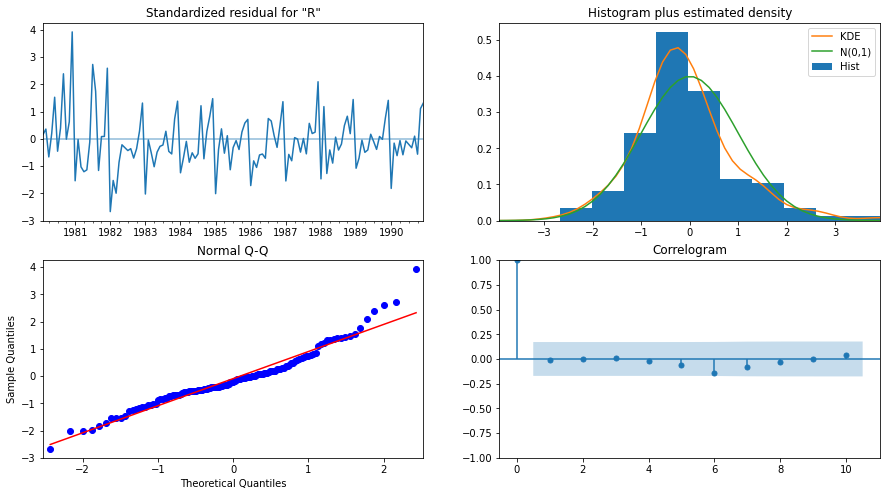

In [345]:
results_auto_ARIMA.plot_diagnostics();

In [346]:
test.head()

,Rose
YearMonth,
1991-01-01,54.0
1991-02-01,55.0
1991-03-01,66.0
1991-04-01,65.0
1991-05-01,60.0


In [347]:
predicted_auto_ARIMA = results_auto_ARIMA.predict(start=test.index[0],end=test.index[-1])

In [348]:
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [349]:
rmse = mean_squared_error(test['Rose'],predicted_auto_ARIMA)#,squared=False
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1296.494614928531 
MAPE: 72.77662590669041


In [350]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1296.494615,72.776626


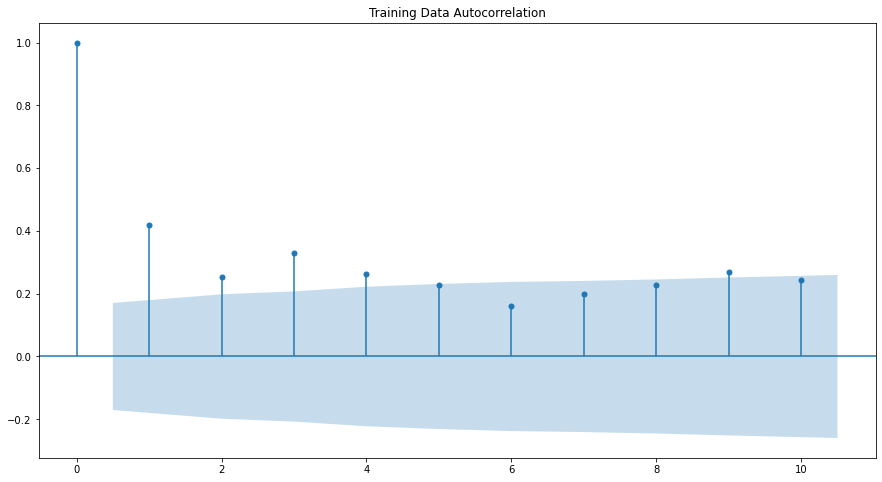

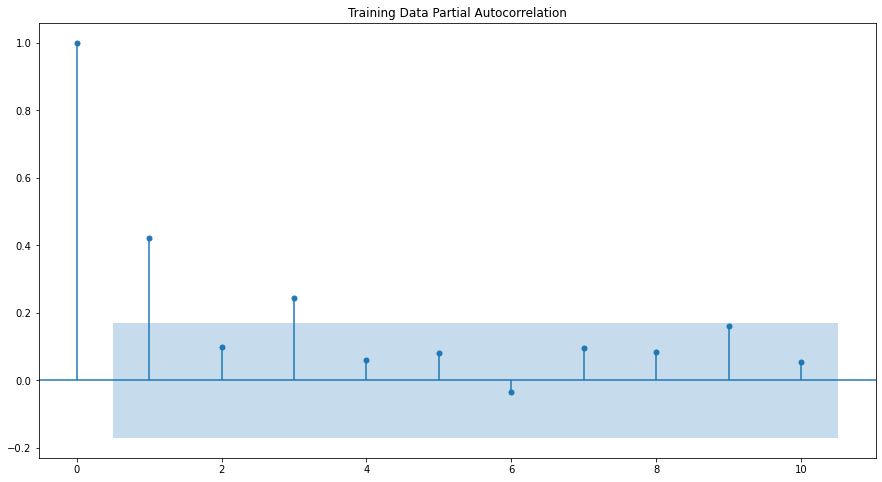

In [351]:
plot_acf(train,lags=10,title='Training Data Autocorrelation')
plot_pacf(train,lags=10,title='Training Data Partial Autocorrelation')
plt.show()

In [352]:
manual_ARIMA = ARIMA(train['Rose'], order=(1,1,1))

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -637.287
Date:                Wed, 20 Oct 2021   AIC                           1280.574
Time:                        22:11:56   BIC                           1289.200
Sample:                    01-01-1980   HQIC                          1284.079
                         - 12-01-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1814      0.076      2.396      0.017       0.033       0.330
ma.L1         -0.9192      0.053    -17.362      0.000      -1.023      -0.815
sigma2       972.5964     88.768     10.957      0.0

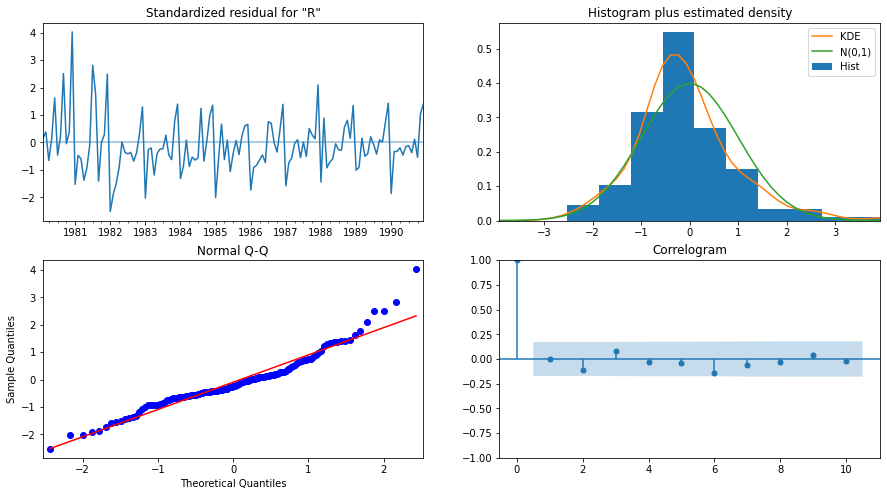

In [353]:
results_manual_ARIMA.plot_diagnostics();

In [354]:
predicted_manual_ARIMA = results_manual_ARIMA.predict(start=test.index[0],end=test.index[-1])

In [355]:
rmse = mean_squared_error(test['Rose'],predicted_manual_ARIMA)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1337.5546760523182 
MAPE: 73.92795697801566


In [356]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(1,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1296.494615,72.776626
"ARIMA(1,1,2)",1337.554676,73.927957


# SARIMA

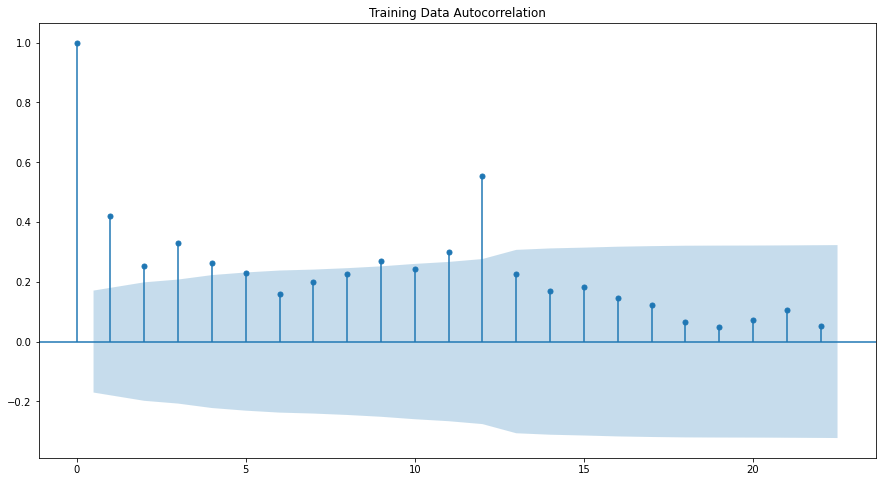

In [357]:
plot_acf(train,title='Training Data Autocorrelation')
plt.show()

In [358]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [359]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

,param,seasonal,AIC


In [360]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1323.9657875279158
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1145.423082720733
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:976.4375296380911
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1139.921738995602
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1116.0207869386036
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:969.6913635753504
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:960.8812220353041
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:962.8794540697521
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:955.573540894562
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1263.5369097383964
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1098.5554825918337
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:923.6314049383859
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1095.793632491795
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1054.743433094527
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:918.8573483302789
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:914.5982866536075
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:915.3332430461672
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:901.1988271349375
SARIMA(0, 1, 2)x(0, 0, 0,

In [361]:
SARIMA_AIC.sort_values(by=['AIC']).head()

,param,seasonal,AIC
26,"(0, 1, 2)","(2, 0, 2, 12)",887.937509
53,"(1, 1, 2)","(2, 0, 2, 12)",889.903048
80,"(2, 1, 2)","(2, 0, 2, 12)",890.668798
69,"(2, 1, 1)","(2, 0, 0, 12)",896.518161
78,"(2, 1, 2)","(2, 0, 0, 12)",897.346444


In [362]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 12)   Log Likelihood                -436.952
Date:                            Wed, 20 Oct 2021   AIC                            889.903
Time:                                    22:12:56   BIC                            911.058
Sample:                                         0   HQIC                           898.474
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1537      0.325      0.472      0.637      -0.484       0.792
ma.L1        -96.9553   3240.710   

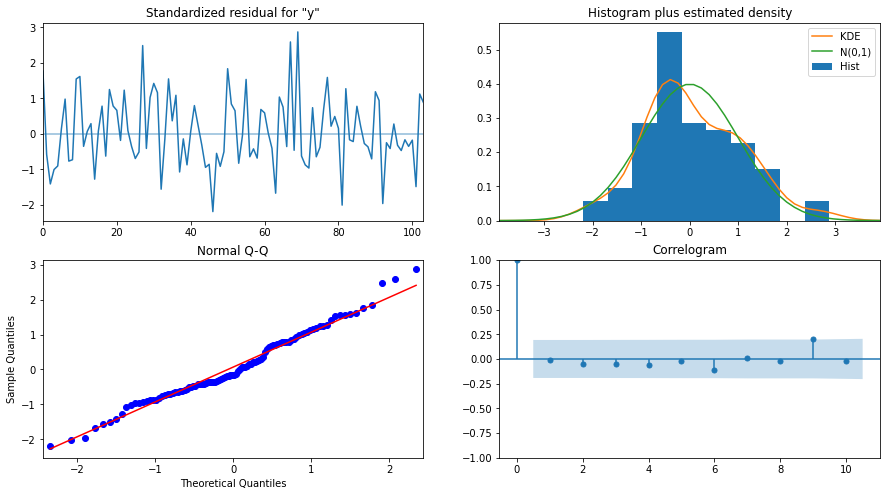

In [363]:
results_auto_SARIMA.plot_diagnostics();


In [364]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [365]:
rmse = mean_squared_error(test['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 26.560134622941337 
MAPE: 53.290207779246145


In [366]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(1,1,2)(2,0,2,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1296.494615,72.776626
"ARIMA(1,1,2)",1337.554676,73.927957
"SARIMA(1,1,2)(2,0,2,12)",26.560135,53.290208


## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots

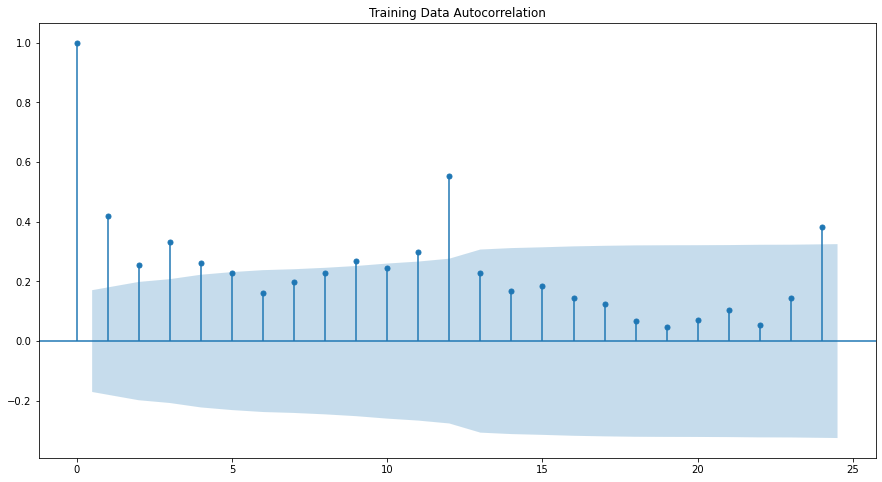

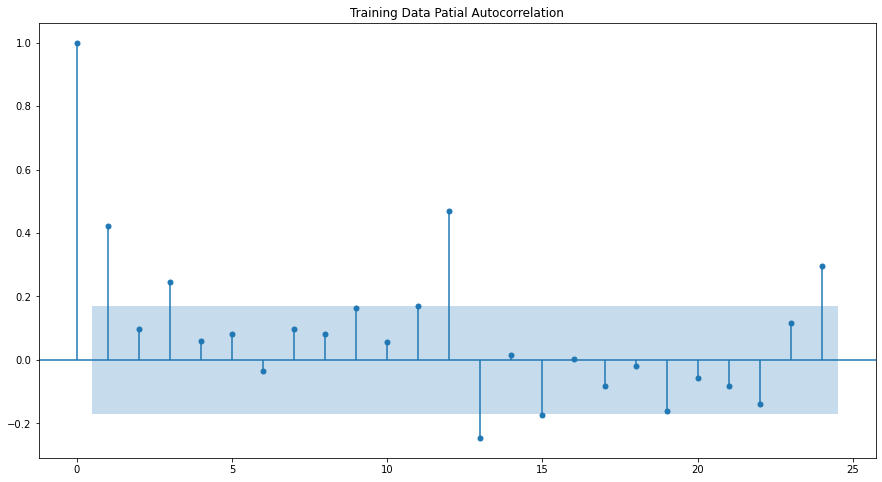

In [367]:
plot_acf(train['Rose'],title='Training Data Autocorrelation',lags=24)
plot_pacf(train['Rose'],title='Training Data Patial Autocorrelation',lags=24)
plt.show()

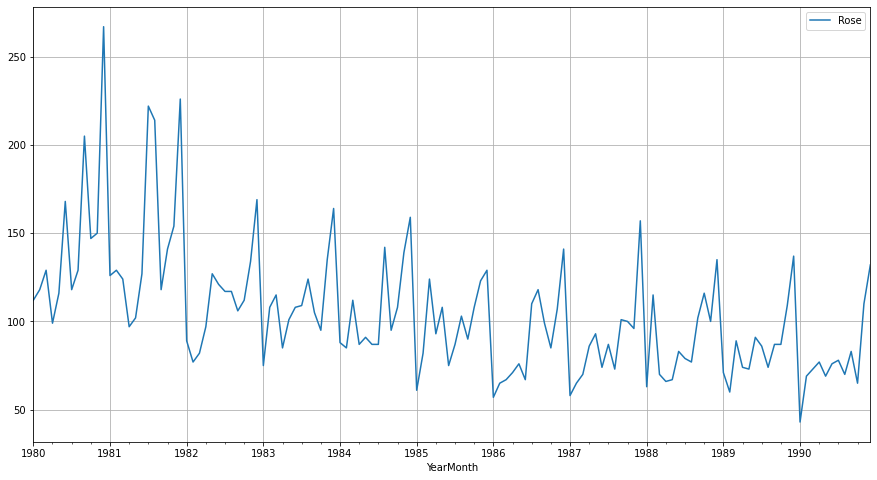

In [368]:
train.plot()
plt.grid();

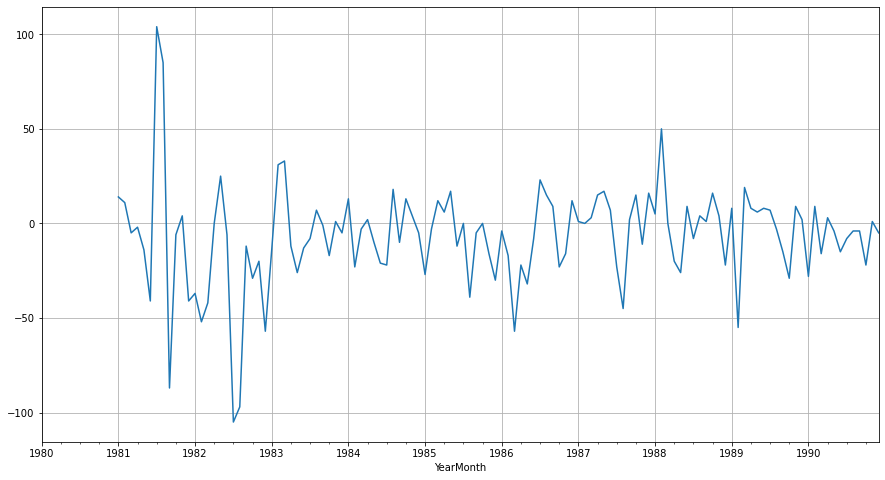

In [369]:
(train['Rose'].diff(12)).plot()
plt.grid();

In [370]:
dftest = adfuller(train['Rose'].diff(12).dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -4.247
DF test p-value is 0.003801400954820892
Number of lags used 11


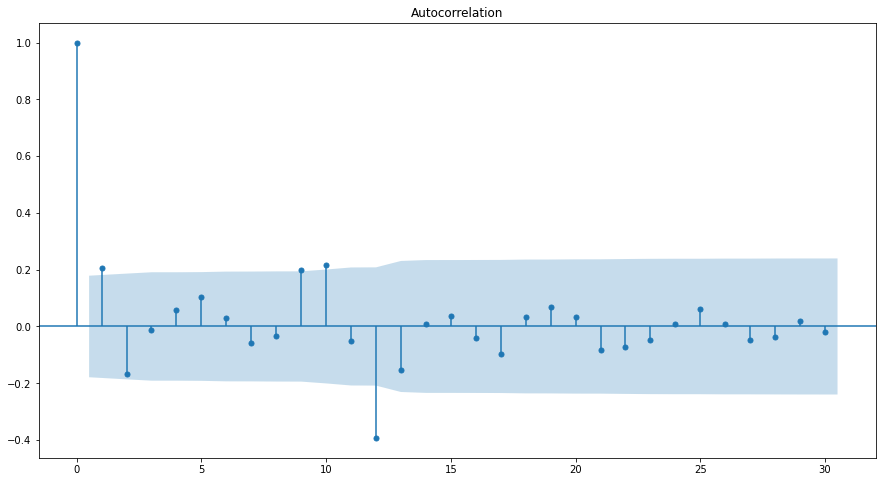

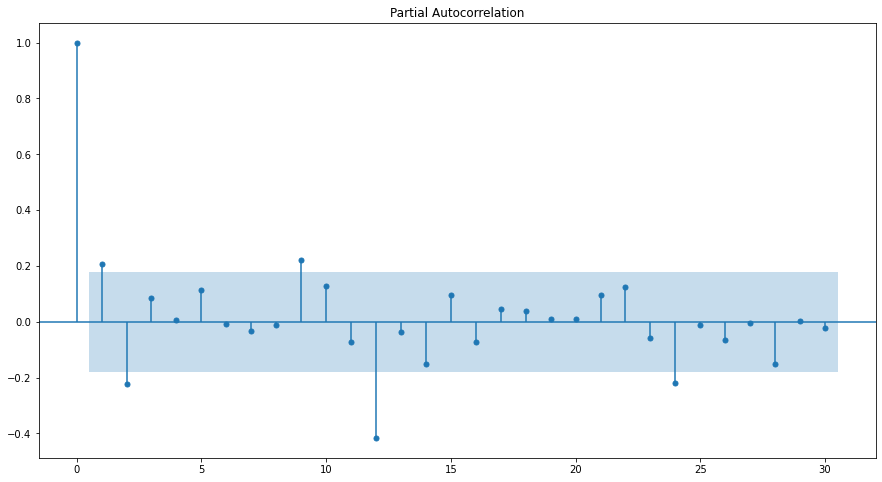

In [371]:
plot_acf(train['Rose'].diff(12).dropna(),lags=30)
plot_pacf(train['Rose'].diff(12).dropna(),lags=30);

In [372]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(1, 0, 2),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                    y   No. Observations:                  132
Model:             SARIMAX(1, 0, 2)x(1, 1, [1], 12)   Log Likelihood                -453.786
Date:                              Wed, 20 Oct 2021   AIC                            919.572
Time:                                      22:13:02   BIC                            935.496
Sample:                                           0   HQIC                           926.025
                                              - 132                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9695      0.008    116.446      0.000       0.953       0.986
ma.L1         -0.78

## Predict on the Test Set using this model and evaluate the model.

In [373]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [374]:
rmse = mean_squared_error(test['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 29.462693646433312 
MAPE: 52.9884012963315


In [375]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(1,0,2)(1,1,1,12)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

,RMSE,MAPE
"ARIMA(2,1,2)",1296.494615,72.776626
"ARIMA(1,1,2)",1337.554676,73.927957
"SARIMA(1,1,2)(2,0,2,12)",26.560135,53.290208
"SARIMA(1,0,2)(1,1,1,12)",29.462694,52.988401


In [376]:
resultsDf.sort_values(by=['RMSE'])

,RMSE,MAPE
"SARIMA(1,1,2)(2,0,2,12)",26.560135,53.290208
"SARIMA(1,0,2)(1,1,1,12)",29.462694,52.988401
"ARIMA(2,1,2)",1296.494615,72.776626
"ARIMA(1,1,2)",1337.554676,73.927957


In [384]:
y_hat_avg = test.copy()
opt_model = ExponentialSmoothing(TES_train['Sparkling'],seasonal='mul',seasonal_periods=12 ).fit()
print(opt_model.summary())

TypeError: 'DataFrame' object is not callable

In [381]:
rmse_model1_test = (metrics.mean_squared_error(test['Rose'],test_predictions_model1))**0.5
mape_model1_test = MAPE(test['Rose'],test_predictions_model1)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f MAPE is %3.2f" %(rmse_model1_test, mape_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 16.626 MAPE is 25.99
